In [67]:
# import packages 
import pandas as pd                   # data management
import matplotlib.pyplot as plt       # graphics 
import datetime as dt                 # check today's date 
import sys                            # check Python version 

# IPython command, puts plots in notebook 
%matplotlib inline

print('Today is', dt.date.today())
print('Python version:\n', sys.version, sep='') ## Question 0

Today is 2017-12-21
Python version:
3.6.2 |Anaconda, Inc.| (default, Sep 21 2017, 18:29:43) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


In [81]:
url = 'https://raw.githubusercontent.com/chrisc617/Data-Bootcamp-Final-Project/master/rollingsales_manhattan%20Clean.csv'
sales = pd.read_csv(url, sep=',')
print(sales.shape)
sales.columns=[i.strip().lower() for i in sales.columns]
sales = sales.drop(sales[['block','lot','ease-ment','building class at present','tax class at time of sale','building class at time of sale']],axis=1)
sales.head()

(18066, 21)


,borough,neighborhood,building class category,tax class at present,address,apartment number,zip code,residential units,commercial units,total units,land square feet,gross square feet,year built,sale price,sale date
0,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,264 EAST 7TH STREET,,10009,3,0,3,"2,059","3,696",1900,"7,738,700",12/22/2016
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,738 EAST 6TH STREET,,10009,11,0,11,"1,750","6,500",1900,"3,750,000",4/3/2017
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,27 AVENUE C,,10009,24,1,25,"2,650","9,960",1910,"5,235,000",7/11/2017
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,151 AVENUE B,,10009,5,0,5,"2,139","4,416",1900,-,6/16/2017
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,153 AVENUE B,,10009,5,0,5,"1,633","6,440",1900,"6,625,000",7/19/2017


In [83]:
sales['sale price'].value_counts(dropna=False)
sales['sale price'] = sales['sale price'].replace(to_replace=[' -   '], value=[None])
sales['sale price'].value_counts(dropna=False)
sales=sales.dropna()
# sales['sale price'].value_counts(dropna=False)
# print(sales.shape)
# sales['land square feet'].value_counts(dropna=False)
# sales['land square feet'] = sales['land square feet'].replace(to_replace=[' -   '], value=[None])
# sales['land square feet'] = sales['land square feet'].replace(to_replace=['           . '], value=[None])
# sales['land square feet'].value_counts(dropna=False)
# sales=sales.dropna()
# sales['land square feet'].value_counts(dropna=False)
print(sales.shape)
sales.head()

(14401, 15)


,borough,neighborhood,building class category,tax class at present,address,apartment number,zip code,residential units,commercial units,total units,land square feet,gross square feet,year built,sale price,sale date
0,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,264 EAST 7TH STREET,,10009,3,0,3,"2,059","3,696",1900,"7,738,700",12/22/2016
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,738 EAST 6TH STREET,,10009,11,0,11,"1,750","6,500",1900,"3,750,000",4/3/2017
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,27 AVENUE C,,10009,24,1,25,"2,650","9,960",1910,"5,235,000",7/11/2017
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,153 AVENUE B,,10009,5,0,5,"1,633","6,440",1900,"6,625,000",7/19/2017
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,301 EAST 10TH STREET,,10009,6,0,6,"2,369","4,615",1900,"8,000,000",11/17/2016


In [86]:
sales[['zip code','borough']] = sales[['zip code','borough']].astype(str)
sales['sale price'] = sales['sale price'].apply(lambda x: x.replace(',',''))
# sales['land square feet'] = sales['land square feet'].apply(lambda x: x.replace(',',''))
sales.head()
# sales[['sale price','land square feet']] = sales[['sale price','land square feet']].astype(float)
sales[['sale price']] = sales[['sale price']].astype(float)
sales.head()

,borough,neighborhood,building class category,tax class at present,address,apartment number,zip code,residential units,commercial units,total units,land square feet,gross square feet,year built,sale price,sale date
0,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,264 EAST 7TH STREET,,10009,3,0,3,2059,"3,696",1900,7738700.0,12/22/2016
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,738 EAST 6TH STREET,,10009,11,0,11,1750,"6,500",1900,3750000.0,4/3/2017
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,27 AVENUE C,,10009,24,1,25,2650,"9,960",1910,5235000.0,7/11/2017
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,153 AVENUE B,,10009,5,0,5,1633,"6,440",1900,6625000.0,7/19/2017
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,301 EAST 10TH STREET,,10009,6,0,6,2369,"4,615",1900,8000000.0,11/17/2016


In [87]:
# sales['sale per sq feet']=sales['sale price']/sales['land square feet']
# sales['sale per sq feet']=sales['sale per sq feet'].round(2)
# sales

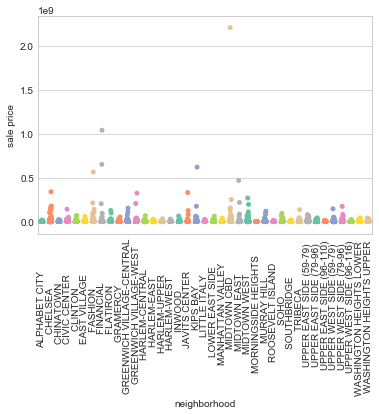

In [89]:
import seaborn as sns
sns.set_style('whitegrid')
ax = sns.stripplot(x='neighborhood', y='sale price',
                  data=sales, jitter=True,
                  palette='Set2', dodge=True, size=5)
for i in ax.get_xticklabels():
    i.set_rotation(90)